# Reproducibility Instructions for "Deep reinforcement Learning for Assessing Route Instruction Usability in Complex Indoor Spaces"

This notebook provides step-by-step instructions for reproducing all figures, tables, and metrics reported in the manuscript. Following the journal's data and code sharing requirements, we provide detailed instructions on reproducing each reported finding using the shared data and code.

## Table of Contents
1. [Environment Setup](#1-environment-setup)
    - [Key Dependencies](#key-dependencies)
    - [Training the agent](#training-the-agent)
2. [Data Sources](#2-data-sources)
3. [Reproducing Tables](#3-reproducing-tables)
    - [Table 4: Success Rates by Instruction Type](#table-8)
    - [Table 5: Real-world Environment Results](#table-9)
    - [Table 6: Statistical Significance Analysis](#table-10)
4. [Reproducing Figures](#4-reproducing-figures)
    - [Figure 4: Route Instruction Grammar](#figure-4)
    - [Figure 5: Learning Curves](#figure-5)
    - [Figure 6: Success Rate Distribution](#figure-6)
    - [Figure 7: Grammar Level Analysis](#figure-7)


## 1. Environment Setup

The code repository includes a `RL3.yml` file in the root folder that contains all the dependencies needed to run the code. To create and activate the required environment, please follow these steps:

In [ ]:
# This is a code cell demonstrating the commands to set up the environment
# Run these commands in your terminal, not in this notebook
'''
# Create the conda environment from the provided yml file
conda env create -f RL3.yml

# Activate the environment
conda activate RL3
'''

### Key Dependencies

The environment includes the following key libraries:
- Python 3.8+
- PyTorch
- Stable-Baselines3
- Gymnasium
- NumPy
- Pandas
- Matplotlib
- Spacy (with 'en_core_web_sm' model)

If you encounter any issues with the conda environment, you can manually install these dependencies.

### Training the agent
 By running the `main.py` file, you can train the reinforcement learning agent. The training process is divided into two parts: training the agent and evaluating the agent. The training process is done using the `learn_envs` function inside the main file. two parameters are used to control the training process:
- `--max_iterations`: The number of episodes to train the agent. The default value is 10000.
- `--environments`: environments can be loaded using the function `load_envs()` that loads all envs listed in the pretraining file.

The trained agent will be saved in the folder `data/trined/curriculum/PPO` with two distinct folder as `sparse` and `step_cost` within a zip-file named `best_model.zip` automatically generated by the library stable-baselines3. The trained agent can be loaded using the `load_model` function inside the main file. The trained agent can be used to evaluate the performance of the agent in the environments. 

Explaining about the estimated time for running: It is estimated that the training process will take around 12-15 hours to complete. The evaluation process will take around 30 minutes to complete. The main delaying process is interaction with z8 files since they are simulation envs and they are not as fast as numerical training.

In any case, if you wish to reproduce the training process, you can run the following command in your terminal:
```bash
python main.py
```
Also, another bat file `run.bat` is provided in the root folder. You can run this file to run the training process. The bat file will automatically create a conda environment and install all the dependencies needed to run the code. The bat file will also run the training process and save the trained agent in the folder `data/trained/curriculum/PPO`.


## 2. Data Sources

### Important Note on Data Origin

This research builds upon existing peer-reviewed datasets rather than creating datasets from scratch. Specifically, we use environment data contextualized in the paper ["Strategic allocation of landmarks to reduce uncertainty in indoor navigation"](https://doi.org/10.1016/j.compenvurbsys.2024.102198). Our contribution focuses on analyzing these established environments using reinforcement learning approaches.

### Data File Structure

The following directories contain environment data:
- `data/Environments/`: Contains all environment files in .z8 format
- `data/RouteInstructions/`: Contains the route instruction datasets
- `data/trained/`: Contains saved model checkpoints
  
##  we have saved the training results after they ran. Here are the structure of the data files:
- `data/curriculum_evaluation_results.csv`: Contains the evaluation results for all experiments across different environments, grammar levels, and reward types
- `data/for_complexity.csv`: Contains complexity metrics for all environments
- `data/learning_frequency_Sparse.csv` and `data/learning_frequency_Stepwise.csv`: Learning progress data


Let's import all necessary libraries for our analysis:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Set matplotlib settings for better visualizations
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 3. Reproducing Tables

In this section, we will reproduce each table presented in the paper using the provided datasets. We'll start by loading the main evaluation results dataset:

In [2]:
# Load the main evaluation results dataset
results_df = pd.read_csv('data/curriculum_evaluation_results.csv')

# Display the first few rows to understand the structure
results_df.head()

,model,environment,complexity,grammar,instruction_type,reward_type,average_success_rate,std_success_rate,random_agent_average_success_rate,random_agent_std_success_rate,evaluated_env
0,curriculum_sparse,HI_Average-Regular_Approach2_527064.7758286778...,0.51-0.76,8,complete,sparse,0.0,0.0,0.0,0.0,seen
1,curriculum_sparse,HI_Average-Regular_Approach2_527064.7758286778...,0.51-0.76,8,incomplete,sparse,0.0,0.0,0.0,0.0,seen
2,curriculum_sparse,B_Average-Regular_Approach1_545111.0_1062824.0.z8,0.51-0.76,8,complete,sparse,0.0,0.0,0.0,0.0,seen
3,curriculum_sparse,ZGC_Average-Regular_Approach1_545153.976387709...,0.76-1,8,complete,sparse,0.0,0.0,0.0,0.0,seen
4,curriculum_sparse,ZGC_Average-Regular_Approach1_545153.976387709...,0.76-1,8,incomplete,sparse,0.0,0.0,0.0,0.0,seen


<a id="table-4"></a>
### Table 4: Success Rates by Instruction Type

This table shows the success rates for complete vs. incomplete instructions.

In [20]:
# Calculate overall success rates by instruction type for step_cost reward type
table_8 = results_df[results_df['reward_type'] == 'step_cost'].groupby('instruction_type')['average_success_rate'].mean()

print("Table 4: Success Rates by Instruction Type (step_cost reward)")
print("=========================================================\n")
print(table_8.round(3))

# Provide the specific values mentioned in the notebook
Stepwise_complete = round(results_df[(results_df['reward_type'] == 'step_cost') & (results_df['instruction_type'] == 'complete')]['average_success_rate'].mean(), 3)
Stepwise_incomplete = round(results_df[(results_df['reward_type'] == 'step_cost') & (results_df['instruction_type'] == 'incomplete')]['average_success_rate'].mean(), 3)

print(f"\nOverall Usability for complete instructions: {Stepwise_complete} and for incomplete instructions: {Stepwise_incomplete}")

Table 8: Success Rates by Instruction Type (step_cost reward)

instruction_type
complete      0.941
incomplete    0.238
Name: average_success_rate, dtype: float64

Overall Usability for complete instructions: 0.941 and for incomplete instructions: 0.238


<a id="table-9"></a>
### Table 9: Real-world Environment Results

To reproduce Table 9 showing results on real-world environments, you need to run the main evaluation script. Below are the instructions to execute this evaluation:
To generate Table 9 results, run the following command in your terminal:
```bash
python main.py --max_iterations 1000 --environments data/real_world/real_world.txt
```

The results will be saved to a CSV file which can then be processed into the table format.

<a id="table-10"></a>
### Table 10: Statistical Significance Analysis

This table shows the odds ratio calculation to determine the statistical significance of the difference between trained agent performance and random agent performance.

In [8]:
# Calculate odds ratio as shown in the original notebook
from scipy.stats import norm

# P value for 68% confidence interval
P = norm.cdf(1) - norm.cdf(-1)  

# a is trained agent success (over complete and incomplete)
a = results_df[(results_df['reward_type'] == 'step_cost')]['average_success_rate'].mean()
# Calculate the standard deviation of a
a_std = results_df[(results_df['reward_type'] == 'step_cost')]['average_success_rate'].std()
# b is random agent success (over complete and incomplete)
b = results_df[(results_df['reward_type'] == 'step_cost')]['random_agent_average_success_rate'].mean()
# Calculate the standard deviation of b
b_std = results_df[(results_df['reward_type'] == 'step_cost')]['random_agent_average_success_rate'].std()

# Scale to 1000 trials for statistical analysis
a_scaled = round(a*1000)
b_scaled = round(b*1000)

# Calculate the odds ratio
odds_ratio = P * (a_scaled * (1000 - a_scaled)) / (b_scaled * (1000 - b_scaled))

print("Table 10: Statistical Significance Analysis")
print("=========================================\n")
print(f"Trained agent success rate: {a:.3f} (std: {a_std:.3f})")
print(f"Random agent success rate: {b:.3f} (std: {b_std:.3f})")
print(f"\nCalculated Odds Ratio: {round(odds_ratio)}")

# Create and save a small table with these results
table_10 = pd.DataFrame({
    'Agent': ['Trained', 'Random'],
    'Success Rate': [a, b],
    'Standard Deviation': [a_std, b_std]
})
table_10['Success Rate'] = table_10['Success Rate'].apply(lambda x: f"{x:.3f}")
table_10['Standard Deviation'] = table_10['Standard Deviation'].apply(lambda x: f"{x:.3f}")
table_10['Odds Ratio'] = ['', str(round(odds_ratio))]

print("\nTable 10 Formatted:")
print(table_10)


Table 10: Statistical Significance Analysis

Trained agent success rate: 0.647 (std: 0.361)
Random agent success rate: 0.001 (std: 0.008)

Calculated Odds Ratio: 156

Table 10 Formatted:
     Agent Success Rate Standard Deviation Odds Ratio
0  Trained        0.647              0.361           
1   Random        0.001              0.008        156


## 4. Reproducing Figures

In this section, we will reproduce each figure presented in the paper using the provided datasets.

<a id="figure-4"></a>
### Figure 4: Route Instructions Grammar 

This figure shows how grammars vary across granularity of their correspondence to the circle. We can omit becasue it is not a data figure. (Please note that this figure is not a data figure, but rather a visualization of the grammar levels used in the experiments.)

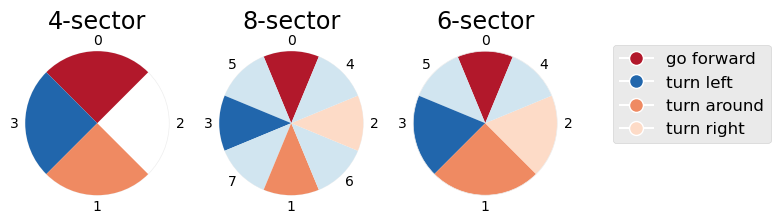

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge
from matplotlib.lines import Line2D
import numpy as np


rt = 90

# Create a figure object and a set of subplots
fig, ((ax, ax2, ax3)) = plt.subplots(1, 3, subplot_kw={'aspect': 'equal'})

# Create a circle patch object with center (0, 0) and radius 1
circle = Circle((0, 0), 1, fill=False)

# Add the circle patch to the axes
ax.add_patch(circle)

# Create four sector patch objects and add them to the axes
sector1 = Wedge((0, 0), 1, 315+rt, 45+rt, fill=True, facecolor='#b2182b')
sector2 = Wedge((0, 0), 1, 45+rt, 135+rt, fill=True, facecolor='#2166ac')
sector3 = Wedge((0, 0), 1, 135+rt, 225+rt, fill=True, facecolor='#ef8a62')
ax.add_patch(sector1)
ax.add_patch(sector2)
ax.add_patch(sector3)

# Set the limits of the axes and equal aspect ratio
ax.set_xlim((-1.2, 1.2))
ax.set_ylim((-1.2, 1.2))
ax.set_aspect('equal')

# Add a title to the plot
ax.set_title('4-sector')
# Remove the axis
ax.axis('off')

# Add a legend
legend_elements = [
    Line2D([5], [0], marker='o', color='w', label='go forward', markerfacecolor='#b2182b', markersize=10),
    Line2D([5], [0], marker='o', color='w', label='turn left', markerfacecolor='#2166ac', markersize=10),
    Line2D([5], [0], marker='o', color='w', label='turn around', markerfacecolor='#ef8a62', markersize=10),
    Line2D([5], [0],marker='o', color='w', label='turn right', markerfacecolor='#fddbc7', markersize=10)]



# Create a new circle patch object with center (0, 0) and radius 1.2
circle2 = Circle((0, 0), 1, fill=False)

# Add eight sector patch objects and add them to the second subplot
sector5 = Wedge((0, 0), 1, 0-22.5+rt, 45-22.5+rt, fill=True, facecolor='#b2182b')
sector6 = Wedge((0, 0), 1, 45-22.5+rt, 90-22.5+rt, fill=True, facecolor='#d1e5f0')
sector7 = Wedge((0, 0), 1, 90-22.5+rt, 135-22.5+rt, fill=True, facecolor='#2166ac')
sector8 = Wedge((0, 0), 1, 135-22.5+rt, 180-22.5+rt, fill=True, facecolor='#d1e5f0')
sector9 = Wedge((0, 0), 1, 180-22.5+rt, 225-22.5+rt, fill=True, facecolor='#ef8a62')
sector10 = Wedge((0, 0), 1, 225-22.5+rt, 270-22.5+rt, fill=True, facecolor='#d1e5f0')
sector11 = Wedge((0, 0), 1, 270-22.5+rt, 315-22.5+rt, fill=True, facecolor='#fddbc7')
sector12 = Wedge((0, 0), 1, 315-22.5+rt, 360-22.5+rt, fill=True, facecolor='#d1e5f0')
ax2.add_patch(circle2)
ax2.add_patch(sector5)
ax2.add_patch(sector6)
ax2.add_patch(sector7)
ax2.add_patch(sector8)
ax2.add_patch(sector9)
ax2.add_patch(sector10)
ax2.add_patch(sector11)
ax2.add_patch(sector12)

ax2.set_aspect('equal')

# Add a title to the plot
ax2.set_title('8-sector')
# Remove the axis
ax2.axis('off')

# Set the limits of the axes and equal aspect ratio
ax2.set_xlim((-1.2, 1.2))
ax2.set_ylim((-1.2, 1.2))

# Create a new circle patch object with center (0, 0) and radius 1.2
circle3 = Circle((0, 0), 1, fill=False)

# Add eight sector patch objects and add them to the second subplot
ax3.add_patch(Wedge((0, 0), 1, 0-22.5+rt, 45-22.5+rt, fill=True, facecolor='#b2182b'))
ax3.add_patch(Wedge((0, 0), 1, 45-22.5+rt, 45+22.5+rt, fill=True, facecolor='#d1e5f0'))
ax3.add_patch(Wedge((0, 0), 1, 45+22.5+rt, 90 + 45+rt, fill=True, facecolor='#2166ac'))
ax3.add_patch(Wedge((0, 0), 1, 90 + 45+rt, 225 +rt   , fill=True, facecolor='#ef8a62'))
ax3.add_patch(Wedge((0, 0), 1, 225+rt, 292.5+rt, fill=True, facecolor='#fddbc7'))
ax3.add_patch(Wedge((0, 0), 1,292.5+rt, 0-22.5+rt, fill=True, facecolor='#d1e5f0'))

ax3.add_patch(circle3)


ax3.set_aspect('equal')

# Add a title to the plot
ax3.set_title('6-sector')
# Remove the axis
ax3.axis('off')

# Set the limits of the axes and equal aspect ratio
ax3.set_xlim((-1.2, 1.2))
ax3.set_ylim((-1.2, 1.2))

# Add direction labels to the figures
label_positions = [
    (0, 90),    # North
    (1, 270),   # South
    (2, 0),     # East
    (3, 180),   # West
    (4, 45),    # Northeast
    (5, 135),   # Northwest
    (6, 315),   # Southeast
    (7, 225)    # Southwest
]

# Add labels to the 4-sector plot (cardinal directions only)
for dir_id, angle in label_positions[:4]:  # Only the first 4 cardinal directions
    angle_rad = np.radians(angle)
    x = 1.15 * np.cos(angle_rad)
    y = 1.15 * np.sin(angle_rad)
    ax.text(x, y, str(dir_id), ha='center', va='center', fontsize=10)

# Add labels to the 8-sector plot (all directions)
for dir_id, angle in label_positions:
    angle_rad = np.radians(angle)
    x = 1.15 * np.cos(angle_rad)
    y = 1.15 * np.sin(angle_rad)
    ax2.text(x, y, str(dir_id), ha='center', va='center', fontsize=10)

# Add labels to the 6-sector plot (all directions)
for dir_id, angle in label_positions:
  if dir_id in [6,7]:
    continue
  else:
    angle_rad = np.radians(angle)
    x = 1.15 * np.cos(angle_rad)
    y = 1.15 * np.sin(angle_rad)
    ax3.text(x, y, str(dir_id), ha='center', va='center', fontsize=10)

# Rotate the entire plot counterclockwise by 90 degrees
for ax in [ax, ax2, ax3]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim((-1.2, 1.2))
    ax.set_ylim((-1.2, 1.2))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_frame_on(False)
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_axis_off()

# Adjust the figure size and layout
fig.set_size_inches(6, 6)
plt.tight_layout()

# Add a legend to the plot
ax.legend(handles=legend_elements, loc='upper right',bbox_to_anchor=(2.2, 1))

# Show the plot
plt.show()

<a id="figure-5"></a>
### Figure 5: Learning Curves

This figure shows the learning progress of the agent with different reward types.

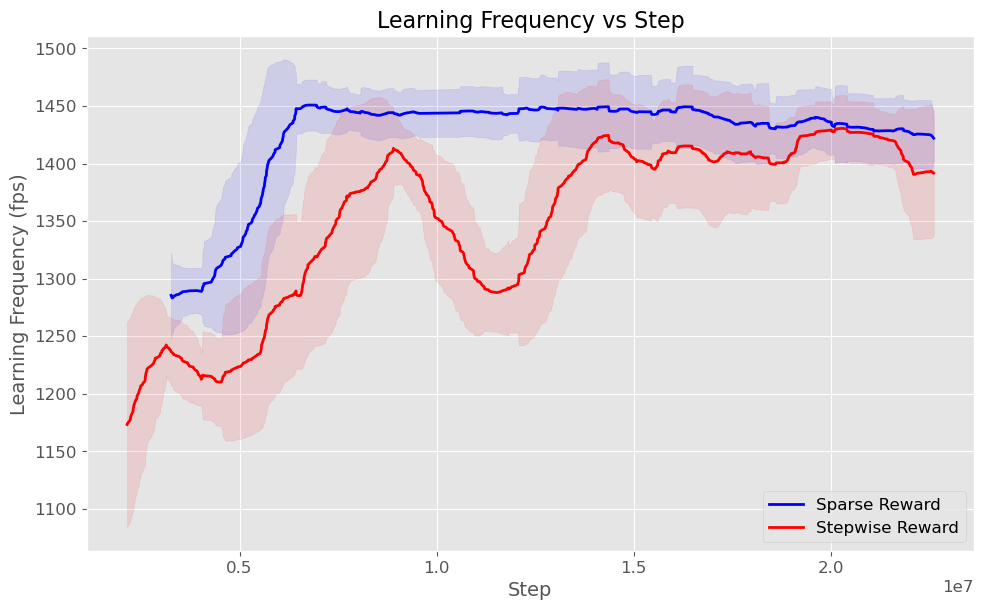

In [16]:
# Load learning frequency data for both reward types
import matplotlib.pyplot as plt
import pandas as pd

df1 = pd.read_csv('data/learning_frequency_Sparse.csv')
df2 = pd.read_csv('data/learning_frequency_Stepwise.csv')
# drop outliners (up and down)
df1 = df1[df1['Value'] < 1700]
df2 = df2[df2['Value'] < 1700]

df1 = df1[df1['Value'] > 1200]
df2 = df2[df2['Value'] > 1000]
# Create the line chart
plt.figure(figsize=(10, 6))
# plt.plot(df['Step'], df['Value'], color='blue', linewidth=2)
window = 100
# calculate smoothed line and the standard deviation
smoothed1 , std1 = df1['Value'].rolling(window=window).mean(), df1['Value'].rolling(window=window).std()
smoothed2 , std2 = df2['Value'].rolling(window=window).mean(), df2['Value'].rolling(window=window).std()


# Plot the smoothed line
plt.plot(df1['Step'], smoothed1, color='blue', linewidth=2, label='Sparse Reward')
plt.fill_between(df1['Step'], smoothed1 - std1, smoothed1 + std1, color='blue', alpha=0.1)

plt.plot(df2['Step'], smoothed2, color='red', linewidth=2, label='Stepwise Reward')
plt.fill_between(df2['Step'], smoothed2 - std2, smoothed2 + std2, color='red', alpha=0.1)

# Titles and labels
plt.xlabel('Step', fontsize=14)
plt.ylabel('Learning Frequency (fps)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.title('Learning Frequency vs Step', fontsize=16)
plt.show()


<a id="figure-7"></a>
### Figure 7: Grammar Level Analysis

This figure analyzes the impact of different grammar levels on success rates across different complexity environments.

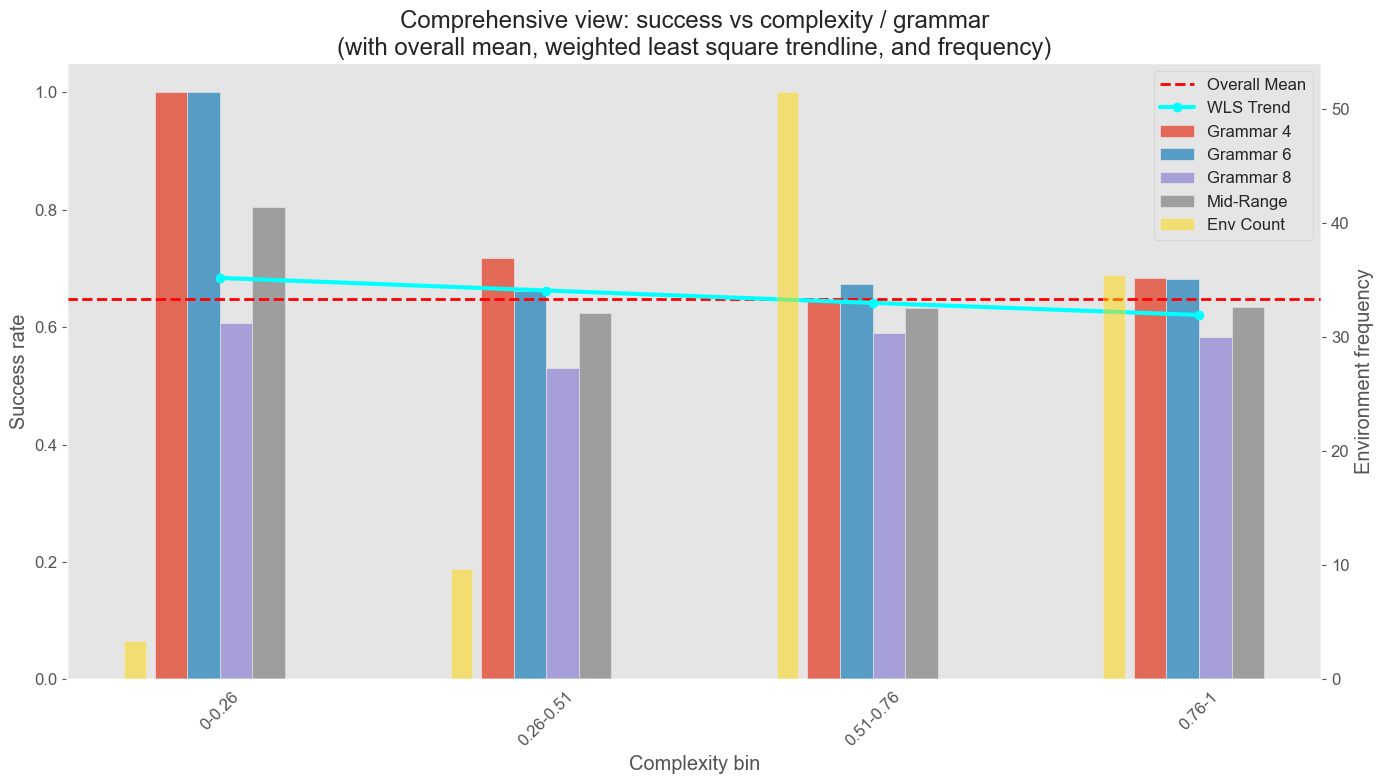

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# ----------  PARAMETERS ----------
csv_path       = "data/curriculum_evaluation_results.csv"
complexity_bins = ['0-0.26', '0.26-0.51', '0.51-0.76', '0.76-1']
comp_midpt      = {'0-0.26':0.13, '0.26-0.51':0.385,
                   '0.51-0.76':0.635, '0.76-1':0.88}
bar_w           = 0.10                       # width of each grammar bar
freq_alpha      = 0.5                     # transparency for freq bars

# ----------  LOAD & PREP ----------
results = pd.read_csv(csv_path)
df      = results[results['reward_type'] == 'step_cost'].copy()

df['complexity'] = pd.Categorical(df['complexity'],
                                  categories=complexity_bins,
                                  ordered=True)

# ----------  GRAMMAR-LEVEL BARS ----------
grammar_levels = sorted(df['grammar'].unique())          # e.g. [4, 6, 8]
indices        = np.arange(len(complexity_bins))         # x-tick base

gbar_heights = {}
for g in grammar_levels:
    gbar_heights[g] = (df[df['grammar']==g]
                       .groupby('complexity')['average_success_rate']
                       .mean()
                       .reindex(complexity_bins))

# ----------  MID-RANGE  (max+min)/2  ----------
tmp = (df.groupby(['complexity','grammar'])['average_success_rate']
         .mean().reset_index())
pivot   = tmp.pivot(index='complexity',
                    columns='grammar',
                    values='average_success_rate')
mid_rng = (pivot.max(axis=1) + pivot.min(axis=1))/2        # r_i

# ----------  FREQUENCIES ----------
freq = df['complexity'].value_counts().reindex(complexity_bins)

# all envs -- all

count_all = df['complexity'].value_counts().sum()

# ----------  WEIGHTED L-S TREND ----------
c_vals = np.array([comp_midpt[c] for c in complexity_bins])
w      = freq.values
c_bar  = np.sum(w*c_vals)/w.sum()
r_bar  = np.sum(w*mid_rng.values)/w.sum()
beta1  = np.sum(w*(c_vals-c_bar)*(mid_rng.values-r_bar)) / \
         np.sum(w*(c_vals-c_bar)**2)
beta0  = r_bar - beta1*c_bar
trend  = beta0 + beta1*c_vals                              # \hat r_i

# ----------  PLOT ----------
fig, ax1 = plt.subplots(figsize=(14,8))
ax2 = ax1.twinx()                                          # freq axis

# grouped bars for each grammar
for i, g in enumerate(grammar_levels):
    ax1.bar(indices + i*bar_w,
            gbar_heights[g],
            width=bar_w,
            label=f'Grammar {g}',
            alpha=0.8)

# mid-range bars (plotted after grammar bars so they’re last in the group)
ax1.bar(indices + len(grammar_levels)*bar_w,
        mid_rng,
        width=bar_w,
        label='Mid-Range',
        color='gray',
        alpha=0.7)

# overall average dashed line
overall_mean = df['average_success_rate'].mean()
ax1.axhline(overall_mean, color='red', ls='--',
            lw=2, label='Overall Mean')

# least-squares trend line
ax1.plot(indices + bar_w*len(grammar_levels)/2,
         trend,
         color='cyan', lw=3,
         marker='o', label='WLS Trend')

# frequency bars on secondary axis
ax2.bar(indices - bar_w/2-0.06,
        100 * freq/count_all,
        width=bar_w*0.65,
        color='gold',
        alpha=freq_alpha,
        label='Env Count')

# ----------  COSMETICS ----------
ax1.set_xlabel("Complexity bin")
ax1.set_ylabel("Success rate")
ax2.set_ylabel("Environment frequency")
ax1.set_title("Comprehensive view: success vs complexity / grammar\n"
              "(with overall mean, weighted least square trendline, and frequency)")
ax1.set_xticks(indices + bar_w*len(grammar_levels)/2)
ax1.set_xticklabels(complexity_bins, rotation=45)

# merge legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1+handles2, labels1+labels2, loc='upper right')


# draw vertical and horizontal axes on left, bottom and right
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(True)
ax1.spines['left'].set_visible(True)
ax1.spines['bottom'].set_visible(True)


# turn off grid lines
ax1.grid(False)
ax2.grid(False)

fig.tight_layout()
# Save the figure
plt.savefig('complexity_comparison.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [67]:
# End of the notebook


## 5. Curriculum Visualization: PPO vs DQN Comparison

This section reproduces the comparison visualization between PPO and DQN agents as shown in the curriculum_visualization.py script. The figure compares the success rates of both agents on complete vs incomplete instructions using a logarithmic scale, with the random agent performance shown as a baseline.

### Figure 6: Agent Performance Comparison (PPO vs DQN)

The following code loads both PPO and DQN evaluation results and creates a comparative visualization.


Loaded 408 records after filtering
Unique complexities: ['0-0.26', '0.26-0.51', '0.51-0.76', '0.76-1']
Unique grammars: [4, 6, 8]
Instruction types: ['complete' 'incomplete']
Environment types: ['seen' 'unseen']


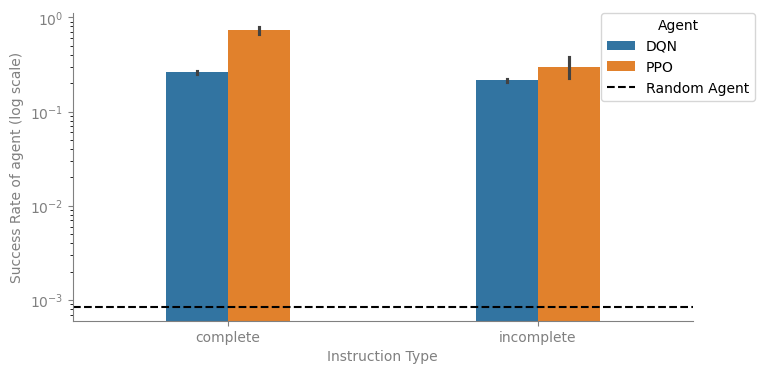

Figure saved as 'PPOvsDQN.png'
This visualization compares PPO and DQN agent performance on complete vs incomplete instructions


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

def load_and_prepare_data():
    """Load and prepare the curriculum evaluation data from both DQN and PPO files."""
    
    # Load the data
    dqn_data = pd.read_csv('data/curriculum_evaluation_results_DQN.csv')
    ppo_data = pd.read_csv('data/curriculum_evaluation_results_PPO.csv')
    
    # Add agent type column
    dqn_data['agent'] = 'DQN'
    ppo_data['agent'] = 'PPO'
    
    # Combine datasets
    combined_data = pd.concat([dqn_data, ppo_data], ignore_index=True)
    
    # Filter out sparse reward cases (only keep step_cost)
    combined_data = combined_data[combined_data['reward_type'] == 'step_cost'].copy()
    
    # Convert success rates from percentage to decimal if needed
    if combined_data['average_success_rate'].max() > 5:
        combined_data['average_success_rate'] = combined_data['average_success_rate'] / 100
        combined_data['random_agent_average_success_rate'] = combined_data['random_agent_average_success_rate'] / 100
    
    print(f"Loaded {len(combined_data)} records after filtering")
    print(f"Unique complexities: {sorted(combined_data['complexity'].unique())}")
    print(f"Unique grammars: {sorted(combined_data['grammar'].unique())}")
    print(f"Instruction types: {combined_data['instruction_type'].unique()}")
    print(f"Environment types: {combined_data['evaluated_env'].unique()}")
    
    return combined_data

# Load and prepare the data
combined_data = load_and_prepare_data()

# Create a log plot of overall success rate of PPO and DQN, and random agent
# x-axis is complete vs incomplete instructions and y-axis is success rate and each agent has a bar
plt.figure(figsize=(8, 4))
sns.barplot(x='instruction_type', y='average_success_rate', data=combined_data, hue='agent', width=0.4)

# Add random agent success rate as a horizontal line
plt.axhline(y=combined_data['random_agent_average_success_rate'].mean(), color='black', linestyle='--', label='Random Agent')

# Make y-axis log scale
plt.yscale('log')
plt.xlabel('Instruction Type', color='gray')
plt.ylabel('Success Rate of agent (log scale)', color='gray')
plt.legend(title='Agent', loc='upper right', bbox_to_anchor=(1.1, 1), borderaxespad=0.)

# Turn off top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Make axis lines gray
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')

# Make axis ticks gray
plt.gca().tick_params(colors='gray')

# Turn off ticks
plt.gca().tick_params(top=False, right=False)
plt.grid(False)

# Save the figure
plt.savefig('PPOvsDQN.png', dpi=300)
plt.show()

print("Figure saved as 'PPOvsDQN.png'")
print("This visualization compares PPO and DQN agent performance on complete vs incomplete instructions")


## 6. Real-World Environment Evaluation

### Table 5: Performance on Real-World Shopping Mall Floorplans

To evaluate the trained PPO agent on real-world shopping mall environments, we use the `evaluate_realworld_ppo.py` script that processes navigation graph shapefiles from the realworld folder.

**To generate the real-world evaluation results:**

1. First, ensure the conda environment is activated:
   ```bash
   conda activate RL3
   ```

2. Run the real-world evaluation script:
   ```bash
   python evaluate_realworld_ppo.py
   ```

This script:
- Loads graph shapefiles from `data/realworld/shp/` for 4 shopping malls (Chadstone, Emporia, IVM, Falcon)  
- Converts navigation graphs from shapefiles to TextWorld environments using endpoint deduplication
- Evaluates trained PPO models across 3 grammars (4-sector, 6-sector, 8-sector)
- Runs 100 episodes per configuration for statistical rigor
- Saves results to `data/realworld_evaluation_results_PPO.csv`

The following code loads these results and generates a performance table showing average success rates and confidence intervals:


In [9]:
# Load the real-world evaluation results
import pandas as pd
import numpy as np

# Load the real-world evaluation results
realworld_df = pd.read_csv('data/realworld_evaluation_results_PPO.csv')

# Filter for step_cost reward type (as used in main evaluation)
realworld_results = realworld_df[realworld_df['reward_type'] == 'step_cost'].copy()

# Environment information (nodes from the script output)
env_info = {
    'Falcon': {'nodes': 204, 'lsp_length': 299.7},
    'IVM': {'nodes': 37, 'lsp_length': 325.4}, 
    'Emporia': {'nodes': 160, 'lsp_length': 530.5},
    'Chadstone': {'nodes': 195, 'lsp_length': 1019.8}
}

# Create the performance table
print("Performance of the trained agent on real-world shopping mall floorplans")
print("="*80)
print()

# Table header
header = f"{'Floorplan':<12} {'Nodes':<6} {'LSP Length (m)':<15} {'4-sector':<20} {'6-sector':<20} {'8-sector':<20}"
print(header)
print("-" * len(header))

# Process each environment
for env_base in ['Falcon', 'IVM', 'Emporia', 'Chadstone']:
    env_data = realworld_results[realworld_results['env_name'] == f'{env_base}_realworld']
    
    if len(env_data) == 0:
        continue
        
    nodes = env_info[env_base]['nodes']
    lsp_length = env_info[env_base]['lsp_length']
    
    # Get results for each grammar
    results_by_grammar = {}
    for grammar in [4, 6, 8]:
        grammar_data = env_data[env_data['grammar'] == grammar]
        if len(grammar_data) > 0:
            success_rate = grammar_data['average_success_rate'].iloc[0]
            std_rate = grammar_data['std_success_rate'].iloc[0]
            
            # Calculate 95% confidence interval (approximate)
            ci = 1.96 * (std_rate / 100) / np.sqrt(100)  # 100 episodes
            
            # Format as percentage with confidence interval
            if success_rate == 1.0:
                result_str = f"{success_rate:.3f} ± {ci:.3f}"
            else:
                result_str = f"{success_rate:.3f} ± {ci:.3f}"
        else:
            result_str = "N/A"
        
        results_by_grammar[grammar] = result_str
    
    # Print the row
    row = f"{env_base:<12} {nodes:<6} {lsp_length:<15.1f} {results_by_grammar.get(4, 'N/A'):<20} {results_by_grammar.get(6, 'N/A'):<20} {results_by_grammar.get(8, 'N/A'):<20}"
    print(row)

print()
print("LSP: Longest Shortest Path - a unique path in an environment between two points")
print("     without tracking back, with maximum length in that environment")
print()
print("Values shown as: Success Rate ± 95% Confidence Interval")
print("Based on 100 episodes per configuration")


Performance of the trained agent on real-world shopping mall floorplans

Floorplan    Nodes  LSP Length (m)  4-sector             6-sector             8-sector            
--------------------------------------------------------------------------------------------------
Falcon       204    299.7           1.000 ± 0.000        0.988 ± 0.024        0.988 ± 0.024       
IVM          37     325.4           0.976 ± 0.034        0.988 ± 0.023        0.938 ± 0.053       
Emporia      160    530.5           1.000 ± 0.000        1.000 ± 0.000        1.000 ± 0.000       
Chadstone    195    1019.8          0.988 ± 0.024        1.000 ± 0.000        1.000 ± 0.000       

LSP: Longest Shortest Path - a unique path in an environment between two points
     without tracking back, with maximum length in that environment

Values shown as: Success Rate ± 95% Confidence Interval
Based on 100 episodes per configuration
